In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = pd.read_csv("data/iris names.txt", names=['names'])
columns

,names
0,sepal length in cm
1,sepal width in cm
2,petal length in cm
3,petal width in cm
4,class


In [3]:
data = pd.read_csv("data/iris2.data", sep="\t", header=None, names=columns['names'])
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [4]:
class_1 = data[data['class'] == 1]
class_2 = data[data['class'] == 2]
class_3 = data[data['class'] == 3]

In [5]:
sepal_length_interval_1 = [class_1['sepal length in cm'].min(), class_1['sepal length in cm'].max()]
sepal_width_interval_1 = [class_1['sepal width in cm'].min(), class_1['sepal width in cm'].max()]
petal_length_interval_1 = [class_1['petal length in cm'].min(), class_1['petal length in cm'].max()]
petal_width_interval_1 = [class_1['petal width in cm'].min(), class_1['petal width in cm'].max()]
sepal_length_interval_2 = [class_2['sepal length in cm'].min(), class_2['sepal length in cm'].max()]
sepal_width_interval_2 = [class_2['sepal width in cm'].min(), class_2['sepal width in cm'].max()]
petal_length_interval_2 = [class_2['petal length in cm'].min(), class_2['petal length in cm'].max()]
petal_width_interval_2 = [class_2['petal width in cm'].min(), class_2['petal width in cm'].max()]
sepal_length_interval_3 = [class_3['sepal length in cm'].min(), class_3['sepal length in cm'].max()]
sepal_width_interval_3 = [class_3['sepal width in cm'].min(), class_3['sepal width in cm'].max()]
petal_length_interval_3 = [class_3['petal length in cm'].min(), class_3['petal length in cm'].max()]
petal_width_interval_3 = [class_3['petal width in cm'].min(), class_3['petal width in cm'].max()]

In [6]:
sepal_length_mean_1 = class_1['sepal length in cm'].mean()
sepal_width_mean_1 = class_1['sepal width in cm'].mean()
petal_length_mean_1 = class_1['petal length in cm'].mean()
petal_width_mean_1 = class_1['petal width in cm'].mean()
sepal_length_mean_2 = class_2['sepal length in cm'].mean()
sepal_width_mean_2 = class_2['sepal width in cm'].mean()
petal_length_mean_2 = class_2['petal length in cm'].mean()
petal_width_mean_2 = class_2['petal width in cm'].mean()
sepal_length_mean_3 = class_3['sepal length in cm'].mean()
sepal_width_mean_3 = class_3['sepal width in cm'].mean()
petal_length_mean_3 = class_3['petal length in cm'].mean()
petal_width_mean_3 = class_3['petal width in cm'].mean()

In [7]:
def stats(*args):
    c = 0
    d = []
    title = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
    rows, cols = [2 for x in range(2)]
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10, 2.5))
    for arg in args:
        data = {
            "Min": [arg[0], arg[1], arg[2]],
            "Mean": [arg[3], arg[4], arg[5]],
            "Max": [arg[6], arg[7], arg[8]]
        }
        d.append(data)
    for i in range(rows):
        for j in range(cols):
            df = pd.DataFrame(data=d[c])
            df.index = ['Class 1', 'Class 2', 'Class 3']
            ax[i,j].table(cellText = df.values, rowLabels = df.index,
                          colLabels = df.columns, cellLoc = 'center')
            ax[i,j].set_title(title[c], pad=-60, y=1.000001)
            ax[i,j].axis('off')
            c += 1

In [8]:
p1 = [sepal_length_interval_1[0], sepal_length_interval_2[0], sepal_length_interval_3[0],
      sepal_length_mean_1, sepal_length_mean_2, sepal_length_mean_3,
      sepal_length_interval_1[1], sepal_length_interval_2[1], sepal_length_interval_3[1]]
p2 = [sepal_width_interval_1[0], sepal_width_interval_2[0], sepal_width_interval_3[0],
      sepal_width_mean_1, sepal_width_mean_2, sepal_width_mean_3,
      sepal_width_interval_1[1], sepal_width_interval_2[1], sepal_width_interval_3[1]]
p3 = [petal_length_interval_1[0], petal_length_interval_2[0], petal_length_interval_3[0],
      petal_length_mean_1, petal_length_mean_2, petal_length_mean_3,
      petal_length_interval_1[1], petal_length_interval_2[1], petal_length_interval_3[1]]
p4 = [petal_width_interval_1[0], petal_width_interval_2[0], petal_width_interval_3[0],
      petal_width_mean_1, petal_width_mean_2, petal_width_mean_3,
      petal_width_interval_1[1], petal_width_interval_2[1], petal_width_interval_3[1]]

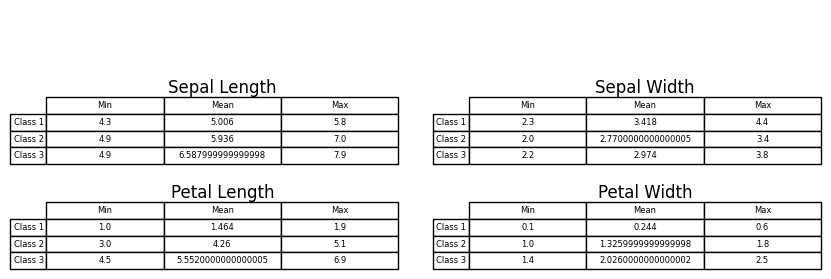

In [9]:
stats(p1, p2, p3, p4)

In [10]:
def draw_plots(df_1, df_2, df_3, rows, cols):
    # df_1 - dataframe of class 1
    # df_2 - dataframe of class 2
    # df_3 - dataframe of class 3
    # rows - row count of a plot group
    # cols - column count of a plot group
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,10))
    columns = df_1.columns.to_list()
    c = 0
    for i in range(rows):
        for j in range(cols):
            ax[i,j].scatter(x=df_1[columns[c]].index, y=df_1[columns[c]], facecolors='none', edgecolors='red')
            ax[i,j].scatter(x=df_2[columns[c]].index, y=df_2[columns[c]], facecolors='none', edgecolors='green')
            ax[i,j].scatter(x=df_3[columns[c]].index, y=df_3[columns[c]], facecolors='none', edgecolors='blue')
            ax[i,j].grid(which='Major', axis='both')
            ax[i,j].set(title=f"{' '.join(columns[c].split()[:2]).title()}",
                        xlabel="Samples",
                        axisbelow=True)
            ax[i,j].set(ylabel="Length, cm") if j/2 == 0 else ax[i,j].set(ylabel="Width, cm")
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"], title="Class distribution")
            c += 1
    fig.savefig("images/parameter_distribution.png")

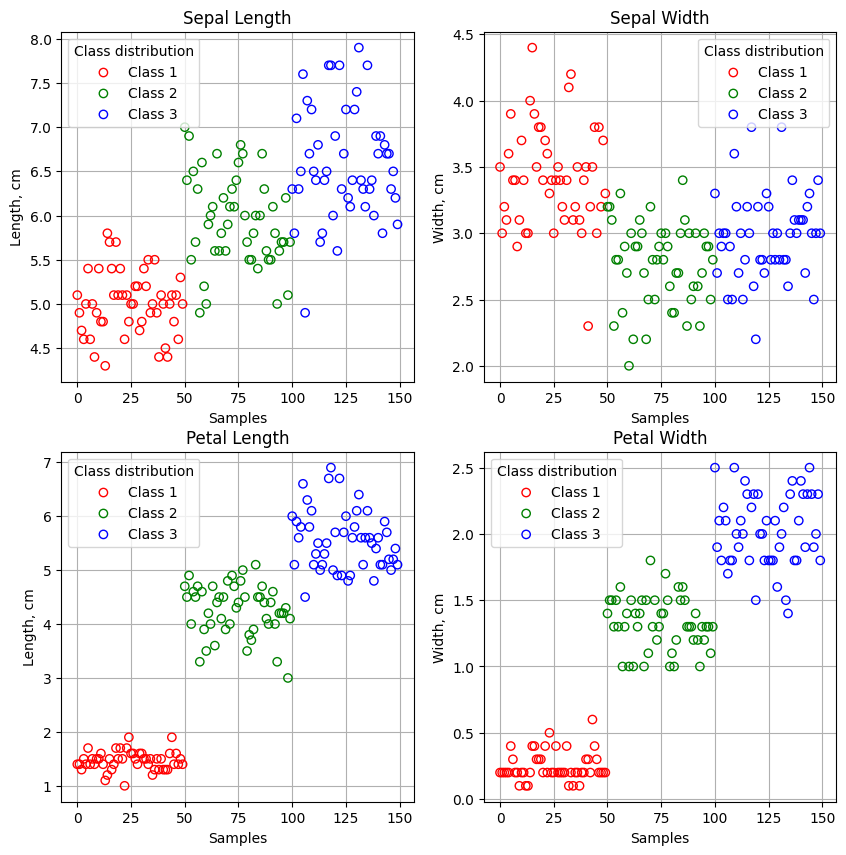

In [11]:
draw_plots(class_1, class_2, class_3, 2, 2)

In [34]:
r1 = np.arange(4.5, 8, 0.01)
r2 = np.arange(2, 4.5, 0.01)
r3 = np.arange(1, 7, 0.01)
r4 = np.arange(0, 2.5, 0.01)
r5 = np.arange(0, 3, 0.01)

In [13]:
def membership(p1, p2, p3, p4, r1, r2, r3, r4, rows, cols):
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,10))
    title = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
    c = 0
    for i in range(rows):
        for j in range(cols):
            if c == 0:
                arg = p1
                x = r1
            elif c == 1:
                arg = p2
                x = r2
            elif c == 2:
                arg = p3
                x = r3
            elif c == 3:
                arg = p4
                x = r4
            trimf1 = fuzz.trimf(x, [arg[0], arg[3], arg[6]])
            trimf2 = fuzz.trimf(x, [arg[1], arg[4], arg[7]])
            trimf3 = fuzz.trimf(x, [arg[2], arg[5], arg[8]])
            ax[i,j].plot(x, trimf1)
            ax[i,j].plot(x, trimf2)
            ax[i,j].plot(x, trimf3)
            ax[i,j].grid(which='Major', axis='both')
            ax[i,j].set_title(title[c])
            ax[i,j].set(ylabel="Membership gradient")
            ax[i,j].set(xlabel="Length, cm") if j/2 == 0 else ax[i,j].set(xlabel="Width, cm")
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"], title="Class membership")
            c += 1

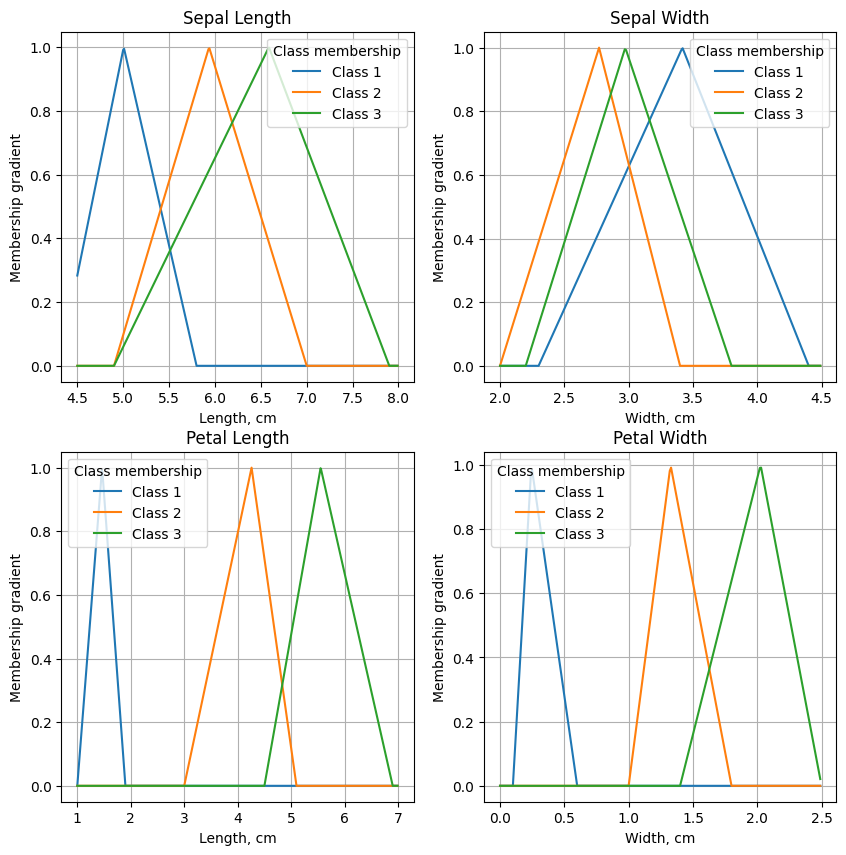

In [14]:
membership(p1, p2, p3, p4, r1, r2, r3, r4, 2, 2)

In [36]:
input1 = fuzz.trimf(r1, [p1[0], p1[3], p1[6]])
input1 += fuzz.trimf(r1, [p1[1], p1[4], p1[7]])
input1 += fuzz.trimf(r1, [p1[2], p1[5], p1[8]])
input2 = fuzz.trimf(r2, [p2[0], p2[3], p2[6]])
input2 += fuzz.trimf(r2, [p2[1], p2[4], p2[7]])
input2 += fuzz.trimf(r2, [p2[2], p2[5], p2[8]])
input3 = fuzz.trimf(r3, [p3[0], p3[3], p3[6]])
input3 += fuzz.trimf(r3, [p3[1], p3[4], p3[7]])
input3 += fuzz.trimf(r3, [p3[2], p3[5], p3[8]])
input4 = fuzz.trimf(r4, [p4[0], p4[3], p4[6]])
input4 += fuzz.trimf(r4, [p4[1], p4[4], p4[7]])
input4 += fuzz.trimf(r4, [p4[2], p4[5], p4[8]])
output = fuzz.trimf(r5, [0, 0.5, 1])
output += fuzz.trimf(r5, [1, 1.5, 2])
output += fuzz.trimf(r5, [2, 2.5, 3])

In [28]:
input1

array([2.83286119e-01, 2.97450425e-01, 3.11614731e-01, 3.25779037e-01,
       3.39943343e-01, 3.54107649e-01, 3.68271955e-01, 3.82436261e-01,
       3.96600567e-01, 4.10764873e-01, 4.24929178e-01, 4.39093484e-01,
       4.53257790e-01, 4.67422096e-01, 4.81586402e-01, 4.95750708e-01,
       5.09915014e-01, 5.24079320e-01, 5.38243626e-01, 5.52407932e-01,
       5.66572238e-01, 5.80736544e-01, 5.94900850e-01, 6.09065156e-01,
       6.23229462e-01, 6.37393768e-01, 6.51558074e-01, 6.65722380e-01,
       6.79886686e-01, 6.94050992e-01, 7.08215297e-01, 7.22379603e-01,
       7.36543909e-01, 7.50708215e-01, 7.64872521e-01, 7.79036827e-01,
       7.93201133e-01, 8.07365439e-01, 8.21529745e-01, 8.35694051e-01,
       8.49858357e-01, 8.79599343e-01, 9.09340329e-01, 9.39081316e-01,
       9.68822302e-01, 9.98563288e-01, 1.02830427e+00, 1.05804526e+00,
       1.08778625e+00, 1.11752723e+00, 1.14726822e+00, 1.16630570e+00,
       1.16928792e+00, 1.17227014e+00, 1.17525237e+00, 1.17823459e+00,
      

In [29]:
input2

array([0.00000000e+00, 1.29870130e-02, 2.59740260e-02, 3.89610390e-02,
       5.19480519e-02, 6.49350649e-02, 7.79220779e-02, 9.09090909e-02,
       1.03896104e-01, 1.16883117e-01, 1.29870130e-01, 1.42857143e-01,
       1.55844156e-01, 1.68831169e-01, 1.81818182e-01, 1.94805195e-01,
       2.07792208e-01, 2.20779221e-01, 2.33766234e-01, 2.46753247e-01,
       2.59740260e-01, 2.85647169e-01, 3.11554079e-01, 3.37460989e-01,
       3.63367898e-01, 3.89274808e-01, 4.15181718e-01, 4.41088627e-01,
       4.66995537e-01, 4.92902446e-01, 5.18809356e-01, 5.53660809e-01,
       5.88512263e-01, 6.23363716e-01, 6.58215170e-01, 6.93066623e-01,
       7.27918077e-01, 7.62769530e-01, 7.97620984e-01, 8.32472437e-01,
       8.67323891e-01, 9.02175344e-01, 9.37026797e-01, 9.71878251e-01,
       1.00672970e+00, 1.04158116e+00, 1.07643261e+00, 1.11128406e+00,
       1.14613552e+00, 1.18098697e+00, 1.21583843e+00, 1.25068988e+00,
       1.28554133e+00, 1.32039279e+00, 1.35524424e+00, 1.39009569e+00,
      

In [30]:
input3

array([0.00000000e+00, 2.15517241e-02, 4.31034483e-02, 6.46551724e-02,
       8.62068966e-02, 1.07758621e-01, 1.29310345e-01, 1.50862069e-01,
       1.72413793e-01, 1.93965517e-01, 2.15517241e-01, 2.37068966e-01,
       2.58620690e-01, 2.80172414e-01, 3.01724138e-01, 3.23275862e-01,
       3.44827586e-01, 3.66379310e-01, 3.87931034e-01, 4.09482759e-01,
       4.31034483e-01, 4.52586207e-01, 4.74137931e-01, 4.95689655e-01,
       5.17241379e-01, 5.38793103e-01, 5.60344828e-01, 5.81896552e-01,
       6.03448276e-01, 6.25000000e-01, 6.46551724e-01, 6.68103448e-01,
       6.89655172e-01, 7.11206897e-01, 7.32758621e-01, 7.54310345e-01,
       7.75862069e-01, 7.97413793e-01, 8.18965517e-01, 8.40517241e-01,
       8.62068966e-01, 8.83620690e-01, 9.05172414e-01, 9.26724138e-01,
       9.48275862e-01, 9.69827586e-01, 9.91379310e-01, 9.86238532e-01,
       9.63302752e-01, 9.40366972e-01, 9.17431193e-01, 8.94495413e-01,
       8.71559633e-01, 8.48623853e-01, 8.25688073e-01, 8.02752294e-01,
      

In [31]:
input4

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06944444, 0.13888889, 0.20833333, 0.27777778,
       0.34722222, 0.41666667, 0.48611111, 0.55555556, 0.625     ,
       0.69444444, 0.76388889, 0.83333333, 0.90277778, 0.97222222,
       0.98314607, 0.95505618, 0.92696629, 0.8988764 , 0.87078652,
       0.84269663, 0.81460674, 0.78651685, 0.75842697, 0.73033708,
       0.70224719, 0.6741573 , 0.64606742, 0.61797753, 0.58988764,
       0.56179775, 0.53370787, 0.50561798, 0.47752809, 0.4494382 ,
       0.42134831, 0.39325843, 0.36516854, 0.33707865, 0.30898876,
       0.28089888, 0.25280899, 0.2247191 , 0.19662921, 0.16853933,
       0.14044944, 0.11235955, 0.08426966, 0.05617978, 0.02808989,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
output

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 0.98, 0.96, 0.94, 0.92,
       0.9 , 0.88, 0.86, 0.84, 0.82, 0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 ,
       0.68, 0.66, 0.64, 0.62, 0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48,
       0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26,
       0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04,
       0.02, 0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18,
       0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ,
       0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62,
       0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84,
       0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.